In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [51]:
expiry_path = "mse_days_to_expiry_unbinned.csv"
diff_path = "mse_diff_unbinned.csv"

expiry_df = pd.read_csv(expiry_path)
diff_df = pd.read_csv(diff_path)

In [61]:
expiry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128800 entries, 0 to 3128799
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DaysToExpiry      float64
 1   ErrorFirstOrder   float64
 2   ErrorEstimate     float64
 3   ErrorCustom       float64
 4   ErrorCouponYield  float64
 5   Error3            float64
 6   Error4            float64
 7   Error5            float64
 8   CouponYield       float64
 9   PaymentFrequency  object 
dtypes: float64(9), object(1)
memory usage: 238.7+ MB


In [62]:
cols = [
    'ErrorFirstOrder', 'ErrorEstimate',
    'ErrorCustom', 'ErrorCouponYield',
    'Error3', 'Error4', 'Error5'
]

expiry_grouped = (
    expiry_df
    .groupby('DaysToExpiry')[cols]
    .agg(lambda x: x.abs().max())
)


In [63]:
cols = [
    'ErrorFirstOrder', 'ErrorEstimate',
    'ErrorCustom', 'ErrorCouponYield',
    'Error3', 'Error4', 'Error5'
]

diff_grouped = (
    diff_df
    .groupby('CouponMinusYield')[cols]
    .agg(lambda x: x.abs().max())
)

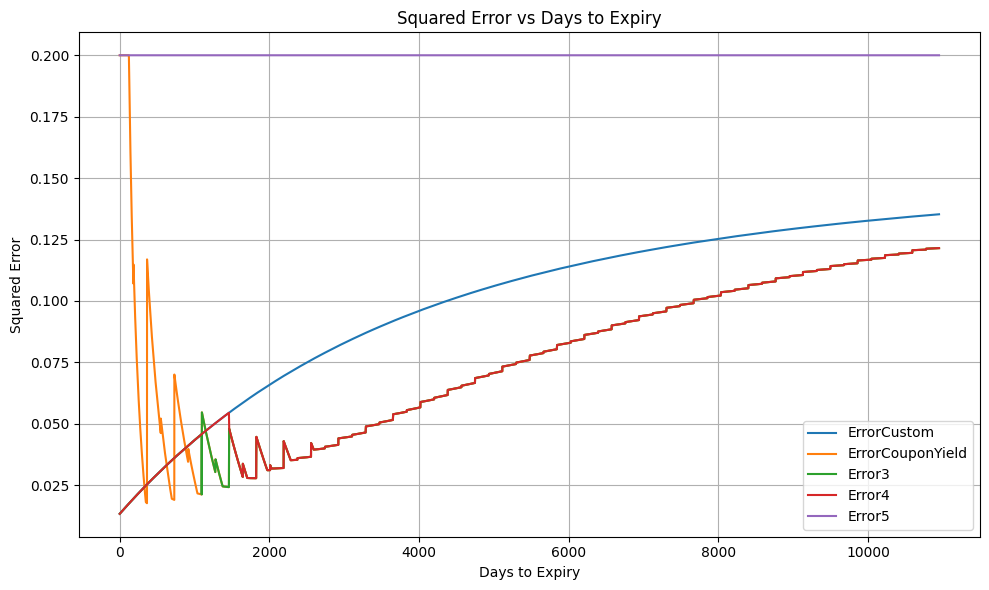

In [64]:
plt.figure(figsize=(10, 6))
error_list = ['ErrorCustom', 'ErrorCouponYield', 'Error3', 'Error4', 'Error5']

for err in error_list:
    plt.plot(expiry_grouped.index, expiry_grouped[err], label=err)

plt.xlabel("Days to Expiry")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Days to Expiry")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

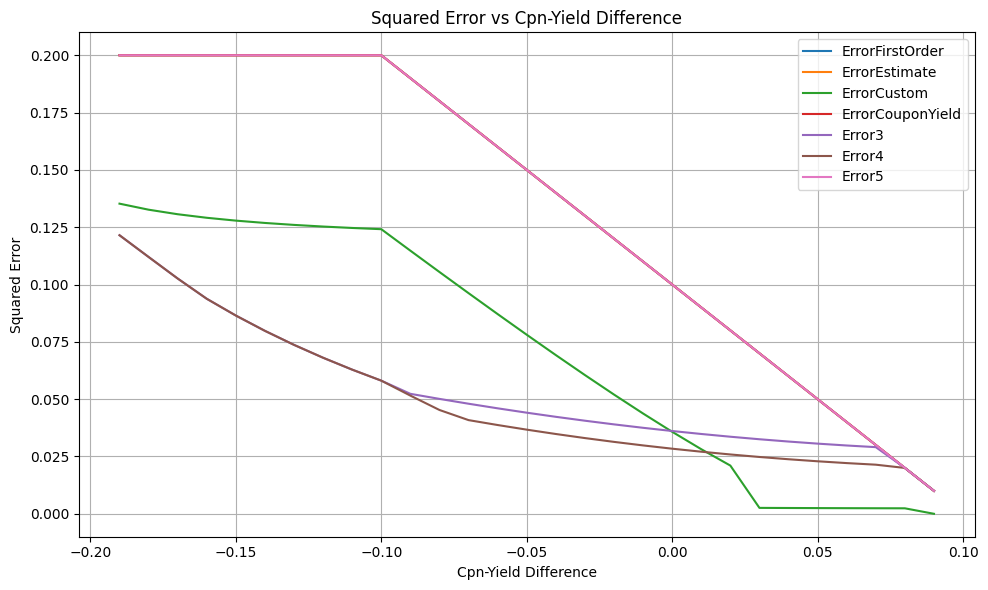

In [65]:
plt.figure(figsize=(10, 6))
error_list = ["ErrorFirstOrder", "ErrorEstimate", 'ErrorCustom', 'ErrorCouponYield', 'Error3', 'Error4', 'Error5']

for err in error_list:
    plt.plot(diff_grouped.index, diff_grouped[err], label=err)

plt.xlabel("Cpn-Yield Difference")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Cpn-Yield Difference")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()